<div style="border:solid green 2px; padding: 20px">

<b>Привет, Сергей! Поздравляю с выполнением очередного проекта!!</b>

Меня зовут Петр Раздобреев и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общени на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее. 
    

### Описание проекта

Необходимо провести маркетинговый анализ развлекательного приложения Procrastinate Pro+. Несмотря на огромные вложения в рекламу, последние несколько месяцев компания терпит убытки. Наша задача — разобраться в причинах и помочь компании выйти в плюс.
Есть данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
лог сервера с данными об их посещениях,
выгрузка их покупок за этот период,
рекламные расходы.
Нам предстоит выяснить:
откуда приходят пользователи и какими устройствами они пользуются,
сколько стоит привлечение пользователей из различных рекламных каналов;
сколько денег приносит каждый клиент,
когда расходы на привлечение клиента окупаются,
какие факторы мешают привлечению клиентов.
Описание данных

В нашем распоряжении три датасета. Файл visits_info_short.csv хранит лог сервера с информацией о посещениях сайта, orders_info_short.csv — информацию о заказах, а costs_info_short.csv — информацию о расходах на рекламу.
Структура visits_info_short.csv:
User Id — уникальный идентификатор пользователя,
Region — страна пользователя,
Device — тип устройства пользователя,
Channel — идентификатор источника перехода,
Session Start — дата и время начала сессии,
Session End — дата и время окончания сессии.
Структура orders_info_short.csv:
User Id — уникальный идентификатор пользователя,
Event Dt — дата и время покупки,
Revenue — сумма заказа.
Структура costs_info_short.csv:
dt — дата проведения рекламной кампании,
Channel — идентификатор рекламного источника,
costs — расходы на эту кампанию.


### Загрузите данные и подготовьте их к анализу

Загрузите данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучите данные и выполните предобработку. Есть ли в данных пропуски и дубликаты? Убедитесь, что типы данных во всех колонках соответствуют сохранённым в них значениям. Обратите внимание на столбцы с датой и временем.

Импортирую все необходимые библиотеки

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

In [2]:
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
ad_costs = pd.read_csv('/datasets/costs_info_short.csv')
events = None

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Приведём название столбцов к нижнему регистра заменим на нижнее__

In [4]:
visits = visits.rename(columns=lambda x: x.lower().replace(' ', '_'))

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Отлично, что не опираешься на конкретные названия столбцов

Преобразуем тип данных к типу время дам дату и время

In [5]:
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])

In [6]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [7]:
orders = orders.rename(columns=lambda x: x.lower().replace(' ', '_'))

In [8]:
orders['event_dt'] = pd.to_datetime(orders['event_dt'])

In [9]:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt']).dt.date

In [10]:
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [11]:
ad_costs = ad_costs.rename(columns=lambda x: x.lower().replace(' ', '_'))

Убедились что пропусков в данных нет

In [12]:
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

In [13]:
orders.head()

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

In [14]:
ad_costs.head()

dt   channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [15]:
visits.info()
orders.info()
ad_costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.

In [16]:
sum(visits.duplicated())

0

In [17]:
sum(orders.duplicated())

0

In [18]:
sum(ad_costs.duplicated())

0

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Ты для каждого датафрейма пишешь очень схожие куски кода, но можно ведь сделать функцию для первичного анализа датафреймов. Смотреть распределение численных значений при помощи `describe`, анализировать какие строки наиболее частые при помощи `value_counts`, ну и `head` с `info` в эту же функцию первичного анализа стоит поместить. Переносить функцию из проекта в проект, чтобы максимально упрощать себе первичный анализ и оставлять больше сил и времени на исследования. Получая зелёные комментарии от ревьюеров.)
    
</div>

дубликатов в данных нет

### Задайте функции для расчёта и анализа LTV, ROI, удержания и конверсии.

Разрешается использовать функции, с которыми вы познакомились в теоретических уроках.

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [19]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    profiles['week'] = profiles['first_ts'].astype('datetime64[W]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles



In [20]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )
    return result_raw, result_grouped, result_in_time


In [21]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 


In [22]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    )

In [23]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean()
    return df    

In [24]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в четвёртой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

 


In [25]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



In [26]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show()



<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
        
Все необходимые функции были заданы, можно приступать к анализу. В принципе можно было добавить `markdown` заголовков, чтобы разграничить функции и упростить поиск нужной

</div>

### Исследовательский анализ данных

- Составьте профили пользователей. Определите минимальную и максимальную даты привлечения пользователей.
- Выясните, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнайте, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучите рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Постройте таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

После каждого пункта сформулируйте выводы.

Составим профили пользователей

In [27]:
profiles = get_profiles(visits, orders, events, ad_costs)
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

                dt      month       week  payer  acquisition_cost  
0       2019-05-07 2019-05-01 2019-05-02   True          1.088172  
1       2019-07-09 2019-07-01 2019-07-04  False          1.107237  
2       2019-10-01 2019-10-01 2019-09-26  False          0.000000  
3       2019-08-22 2019-08-01 2019-08-22  False          0.988235  
4       2019-10-02 2019-10-01 2019-09-26  False          0.230769  
...            ...        ...        ...    ...               ...  
150003  2019-09-28 2019-09-01 2019-09-26  False          3.500000  
150004  2019-10-21 2019-10-01 2019-10-17  False          0.000000  
150005  2019-07-23 2019-07-01 2019-07-18  False          2.600000  
150006  2019-09-28 2019-09-01 2019-09-26  False          0.205714  
150007  2019-10-18 2019-10-01 2019-10-17  False          0.000000  

[150008 rows x 10 columns]

Определим минимальную и максимальную дату

In [28]:
min_date = profiles['first_ts'].min()
min_date

Timestamp('2019-05-01 00:00:41')

In [29]:
max_date = profiles['first_ts'].max()
max_date

Timestamp('2019-10-27 23:59:04')

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* Отлично, что проверили корректность временного интервала. Соответствует ли этот период указанному в задании? Хотелось бы в проекте видеть акцент на этом моменте. 
* В принципе нет необходимости в дополнительных переменных, ведь ты их используешь однократно и можно прям при выводе рассчитать эти значения 


Зададим дату наблюдения 1 ноября 2019г. и горизонт наблюдения 14 дней

In [30]:
observation_date=datetime(2019,11,1).date()
horizon_days = 14

In [31]:
region_stats = profiles.groupby('region').agg(
    total_users=('user_id','count'), total_payers=('payer','sum')
)
region_stats['per_users'] = region_stats['total_payers']/region_stats['total_users'] *100
region_stats.sort_values(by='per_users', ascending = False)

total_users  total_payers  per_users
region                                             
United States       100002          6902   6.901862
Germany              14981           616   4.111875
UK                   17575           700   3.982930
France               17450           663   3.799427

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
* В принципе можно было посчитать процент платящих, применив `mean` к столбцу `payer`,
    
* Eсть любопытный способ, который позволяет облагородить вывод в частности и дробей - `style.format`, начать читать про него можно [тут](https://habr.com/ru/post/521894/)


</div>

Определили из каких регионов у нас есть пользователи и определили долю платящих пользователей самое высокое количество пользователей из США и там же самый высокая доля платящих

In [32]:
device_stats = profiles.groupby('device').agg(
    total_users=('user_id','count'), total_payers=('payer','sum')
)
device_stats['per_users'] = device_stats['total_payers']/device_stats['total_users'] *100
device_stats.sort_values(by='per_users', ascending = False)

total_users  total_payers  per_users
device                                       
Mac            30042          1912   6.364423
iPhone         54479          3382   6.207897
Android        35032          2050   5.851793
PC             30455          1537   5.046790

Провели разбиение по устройством и также определили долю платящих пользователей по устройству. Больше всего пользователей пользуются iPhone ом самый высокой процент платящих через Mac при этом процент платящих очень близок для всех четырёх устройств

In [33]:
channel_stats = profiles.groupby('channel').agg(
    total_users=('user_id','count'), total_payers=('payer','sum')
)
channel_stats['per_users'] = channel_stats['total_payers']/channel_stats['total_users'] *100
channel_stats.sort_values(by='per_users', ascending = False)

total_users  total_payers  per_users
channel                                                 
FaceBoom                  29144          3557  12.204914
AdNonSense                 3880           440  11.340206
lambdaMediaAds             2149           225  10.469986
TipTop                    19561          1878   9.600736
RocketSuperAds             4448           352   7.913669
WahooNetBanner             8553           453   5.296387
YRabbit                    4312           165   3.826531
MediaTornado               4364           156   3.574702
LeapBob                    8553           262   3.063253
OppleCreativeMedia         8605           233   2.707728
organic                   56439          1160   2.055316

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
От органики так мало платящих, так как зачастую закупочные каналы оптимизируются с целью приведения максимально платящей аудитории, а органические пользователи случаются разные</div>

Рассмотрели каналы привлечения пользователей определили из каких каналов самый высокий процент платящих пользователей. Больше всего пользователей пришло органик при этом там самый низкий процент платящих пользователей на втором месте Faceboom и там же самый высокий процент платящих пользователей на третьем месте Tip-Top по привлечению и четвёртый по платящим пользователям

### Маркетинг

- Посчитайте общую сумму расходов на маркетинг.
- Выясните, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Постройте график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируйте динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнайте, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используйте профили пользователей.

Напишите промежуточные выводы.

Определим общую сумму расходов на маркетинг

In [34]:
total_costs = ad_costs['costs'].sum()
total_costs

105497.30000000002

Выясним как расходы распределены по рекламным источникам

In [35]:
costs_by_channel = ad_costs.groupby('channel')['costs'].sum().sort_values(ascending=False)
costs_by_channel

channel
TipTop                54751.30
FaceBoom              32445.60
WahooNetBanner         5151.00
AdNonSense             3911.25
OppleCreativeMedia     2151.25
RocketSuperAds         1833.00
LeapBob                1797.60
lambdaMediaAds         1557.60
MediaTornado            954.48
YRabbit                 944.22
Name: costs, dtype: float64

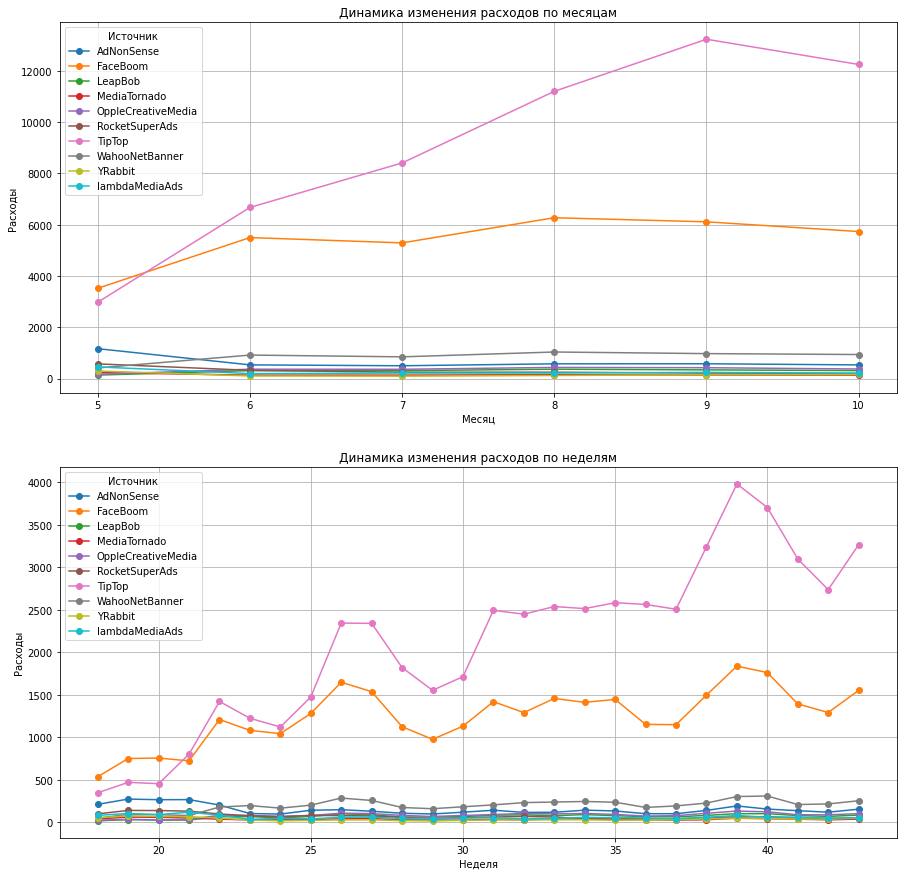

In [36]:
ad_costs['dt'] = pd.to_datetime(ad_costs['dt'])
ad_costs['month'] = ad_costs['dt'].dt.month
ad_costs['week'] = ad_costs['dt'].dt.isocalendar().week
monthly_costs = ad_costs.groupby(['month','channel'])['costs'].sum().unstack()
weekly_costs = ad_costs.groupby(['week','channel'])['costs'].sum().unstack()
weekly_costs
fig, axes = plt.subplots(2,1,figsize=(15,15))
monthly_costs.plot(kind='line', marker='o', ax=axes[0])
axes[0].set_title('Динамика изменения расходов по месяцам')
axes[0].set_xlabel('Месяц')
axes[0].set_ylabel('Расходы')
axes[0].grid(True)
axes[0].legend(title='Источник')



weekly_costs.plot(kind='line', marker='o', ax=axes[1])
axes[1].set_title('Динамика изменения расходов по неделям')
axes[1].set_xlabel('Неделя')
axes[1].set_ylabel('Расходы')
axes[1].grid(True)
axes[1].legend(title='Источник')


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️
    
Для того, чтобы внимательнее изучить колебания затрат по каналам можно строить несколько графиков по размеру значений, здесь это не так критично, но вообще не особо понятно, как там дела с бюджетом всех каналов кроме двух крупнейших
</div>

Рассмотрели динамику расходов по источникам По неделям и по месяцамвыяснили что основные расходы связаны с продвижением Faceboom и TipTop на TipTop тратится денег больше всего. Расходы растут.

In [37]:

# days_num = (max_date - min_date).days

# daily_costs = []
# for index, values in ad_costs.iterrows():
#     channel_name = values['channel']
#     channel_costs = values['costs']
#     avg_channel_costs = channel_costs / days_num
#     for i in range(days_num):
#         current_day = min_date + timedelta(days=i)
#         daily_costs += [[current_day, channel_name, avg_channel_costs]]

# # создаём датафрейм с тратами на рекламу по дням
# daily_costs = pd.DataFrame(daily_costs, columns=['dt', 'channel', 'costs'])
# daily_costs['dt'] = daily_costs['dt'].dt.date

# users =  get_profiles(visits, orders, events, daily_costs) # получите профили пользователей



In [38]:
# users


In [39]:
# profiles.pivot_table(
#     index='dt', columns='channel', values = 'acquisition_cost', aggfunc='mean'
# ).plot(grid=True, figsize=(15,15))
# plt.show()

In [40]:
# users.pivot_table(
#     index='week', columns='channel', values = 'acquisition_cost', aggfunc='mean'
# ).plot(grid=True, figsize=(15,15))
# plt.show()

In [41]:
# users.pivot_table(
#     index='month', columns='channel', values = 'acquisition_cost', aggfunc='mean'
# ).plot(grid=True, figsize=(15,15))
# plt.show()

In [42]:
# users.pivot_table(
#     index='dt', columns='channel', values = 'acquisition_cost', aggfunc='mean'
# ).plot(grid=True, figsize=(15,15))
# plt.show()

In [43]:
acc_by_channel = profiles.groupby('channel')['acquisition_cost'].mean().sort_values(ascending=False)
acc_by_channel

channel
TipTop                2.799003
FaceBoom              1.113286
AdNonSense            1.008054
lambdaMediaAds        0.724802
WahooNetBanner        0.602245
RocketSuperAds        0.412095
OppleCreativeMedia    0.250000
YRabbit               0.218975
MediaTornado          0.218717
LeapBob               0.210172
organic               0.000000
Name: acquisition_cost, dtype: float64

### Оценка окупаемости рекламы

Используя графики LTV, ROI и CAC, проанализируйте окупаемость рекламы. Считайте, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения. Необходимость включения в анализ органических пользователей определите самостоятельно.

- Проанализируйте окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проверьте конверсию пользователей и динамику её изменения. То же самое сделайте с удержанием пользователей. Постройте и изучите графики конверсии и удержания.
- Проанализируйте окупаемость рекламы с разбивкой по устройствам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Проанализируйте окупаемость рекламы с разбивкой по рекламным каналам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI.
- Ответьте на такие вопросы:
    - Окупается ли реклама, направленная на привлечение пользователей в целом?
    - Какие устройства, страны и рекламные каналы могут оказывать негативное влияние на окупаемость рекламы?
    - Чем могут быть вызваны проблемы окупаемости?

Напишите вывод, опишите возможные причины обнаруженных проблем и промежуточные рекомендации для рекламного отдела.

<div class="alert alert-info"> <b>Так как нас интересует окупаемость рекламы, то имеет смысл исключить из рассмотрения органических пользователей.</div> 

In [44]:
profiles = profiles[profiles['channel'] != 'organic']

In [45]:
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)


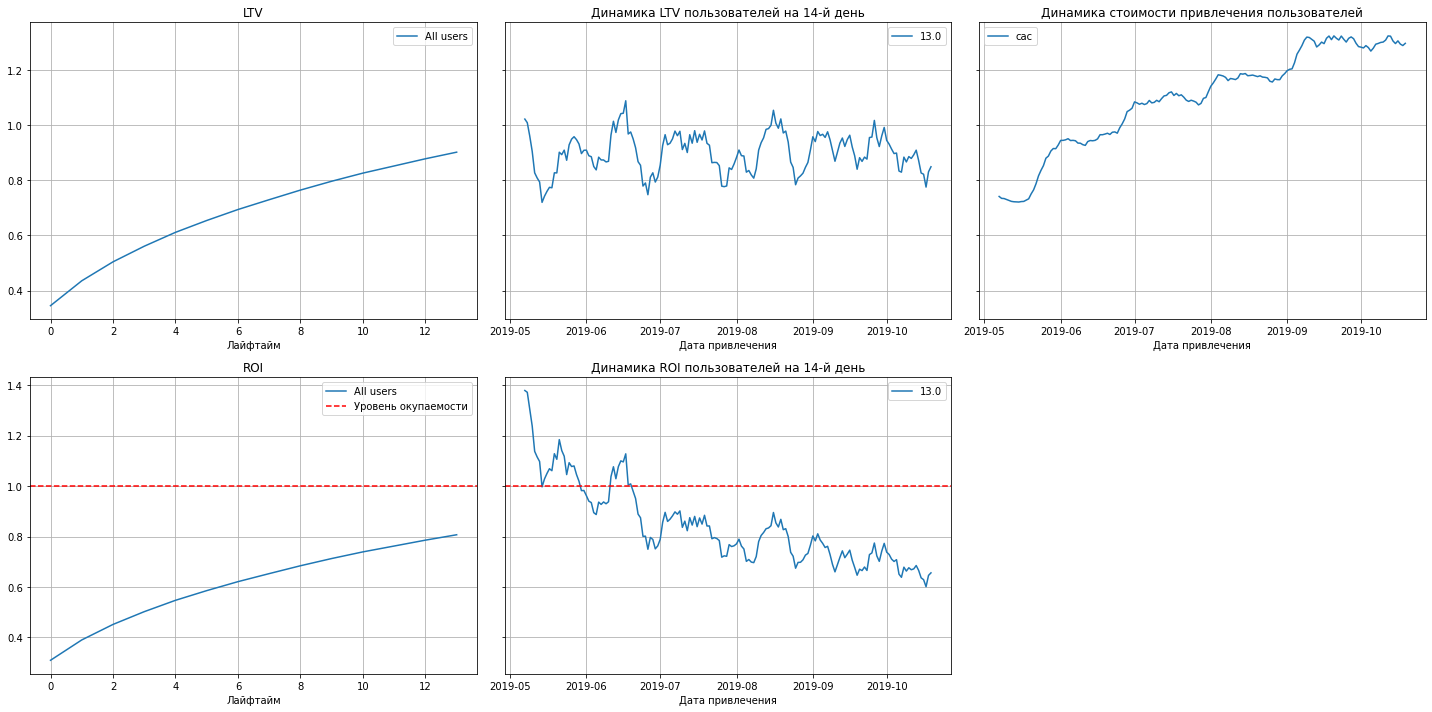

In [46]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️
    
* Здесь и ниже при анализе стоит исключать органический трафик, мы не платим за этих пользователей, а доход от них может завышать довольно плачевную картину и скрыть от нас проблемы в какой-то стране или же типе устройств. Соответственно и выводы после этих правок могут поменяться, поэтому жду исключения из дальнейшего анализа всех органических пользователей и после этого прокомментирую оставшуюся часть проекта. 
* Прошу ещё рассчитать конверсию и удержание по каналам, странам, устройствам, это дополнительная детализация позволит выявить проблемы окупаемости. 

<div class="alert alert-info"> <b>по графикам делаем выводы:
Реклама не окупается. На 14й день выходит только на 80% окупаемости.
Динамика LTV стабильна. Есть помесячные колебания.
САС растет. Очевидно, что с ростом расходов на рекламу мы не получаем адекватного роста числа клиентов.
ROI 14го дня падает. И перестает выходить на т.окупаемости уже в первые 1-2мес рассматриваемого периода. И продолжает падать.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Стабильность `LTV` и рост `CAC`, может говорить о росте конкуренции на канале или увеличением бюджета по каналу.</div>

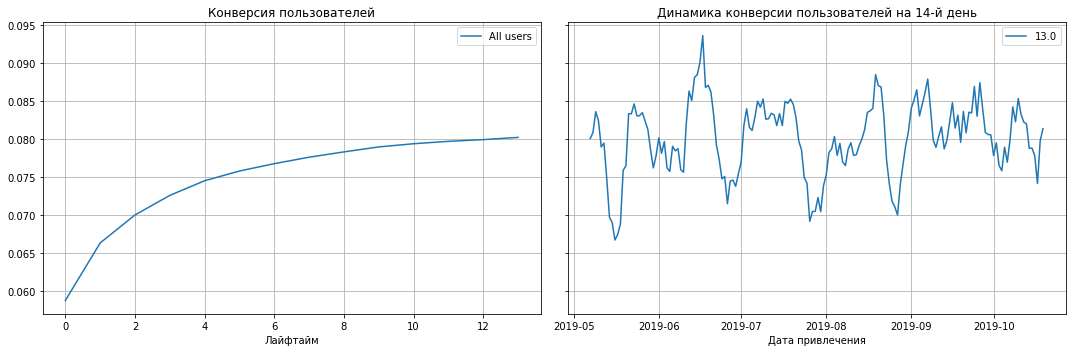

In [47]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

Конверсия выросла в первый месяц дальше с учётом колебаний оставалась стабильный

<div class="alert alert-info"> <b> Конверсия 14го дня относительно стабильна в рассматриваемый период и составляет около 8%. </div> 

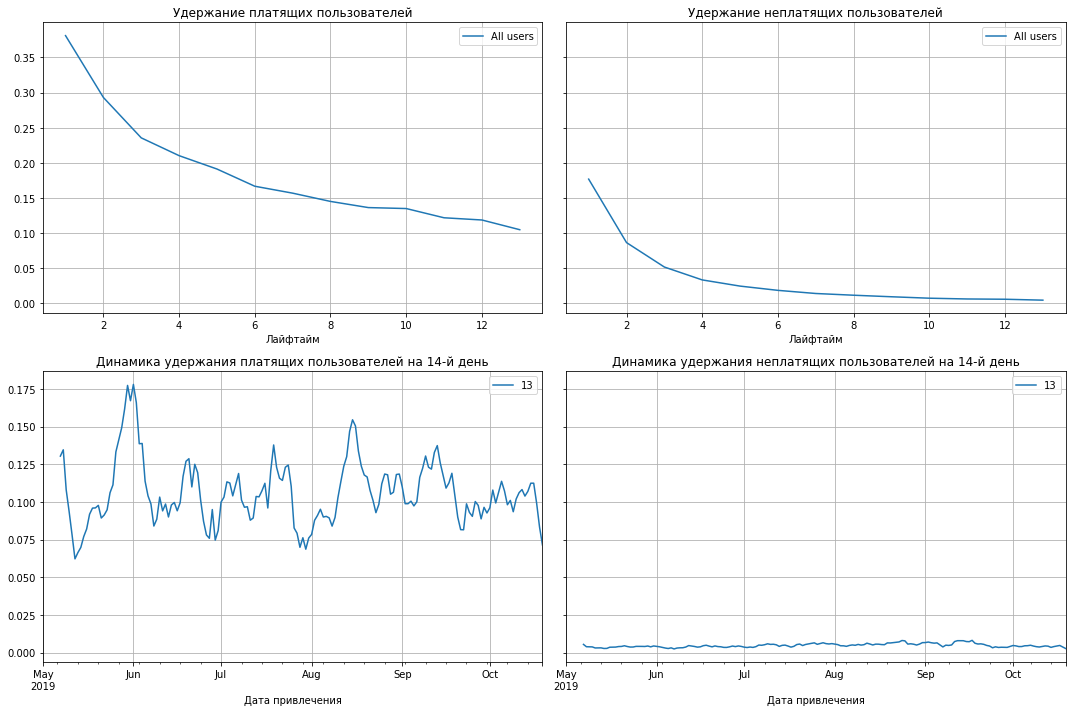

In [48]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)
plot_retention(retention_grouped, retention_history, horizon_days)

Графики показывает падение удержания

<div class="alert alert-info"> <b> динамика удержания платящих пользователей на 14й день относительно стабильна и составляет порядка 10-11% </div>

In [49]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

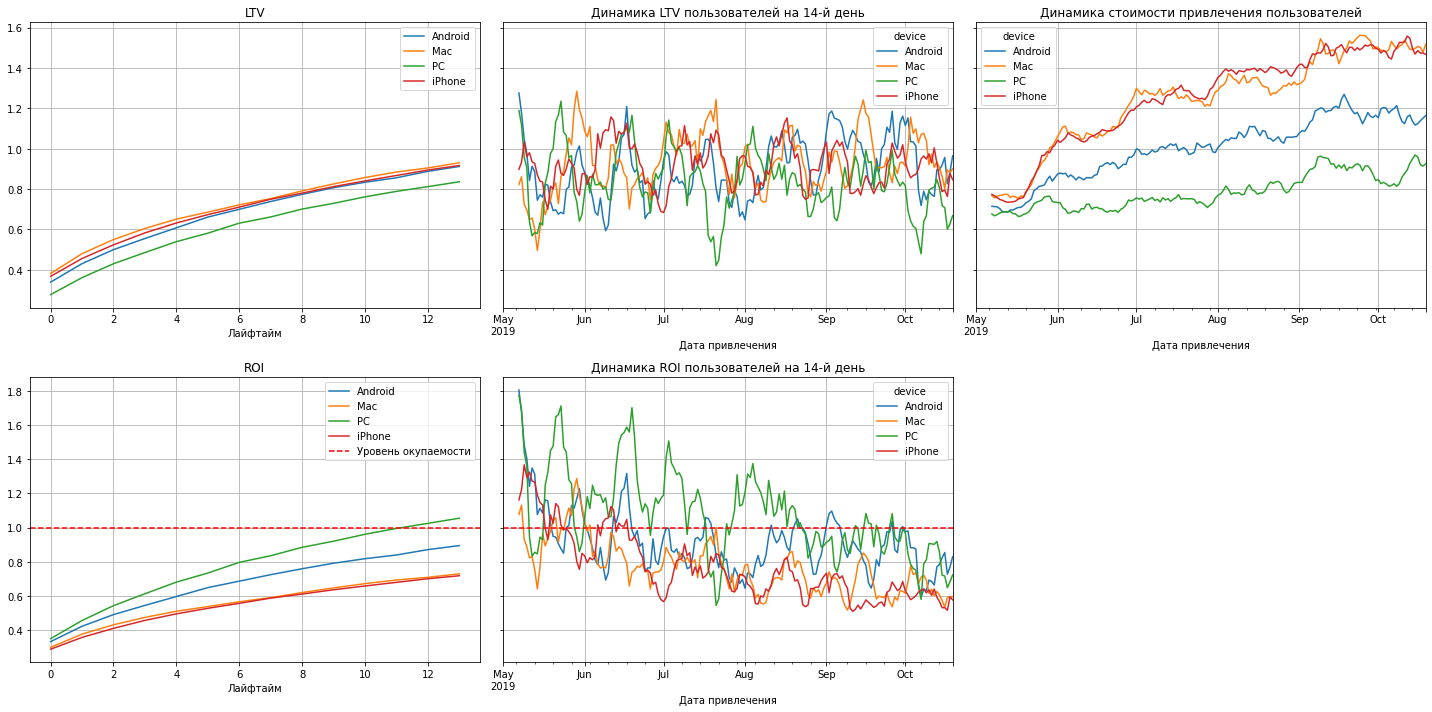

In [50]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Хочу акцентировать твоё внимание на способе решения в данном случае комплексной задачи - неокупаемость маркетинга. Мы эту составную проблему раскладываем на частные причины, декомпозируем весь трафик по странам, устройствам, регионам и ищем где конкретно и в какой момент случилась проблема. Опять же рекомендую здесь тоже использовать маркированный список) 
</div>

Разбивка по устройствам показывает что стоимость привлечения пользователей на всех устройствах растёт при этом максимальная стоимость привлечения на iPhone и Mac и именно iPhone и Mac не выходит на точку окупаемости андроид и PC выходит

<div class="alert alert-info"> <b> анализ по устройствам показывает, что самая высокая стоимость привлечения пользователей на iOS (iPhone Mac) и у них же самая плозая окупаемость. Относительно хорошая ситуация у PC. Наименьшая стоимость привлечения и лучшая ситуация по окупаемости. Но и у них окупаемость 14го дня значительно упала в рассматриваемый период и вышла в убыток. </div>  

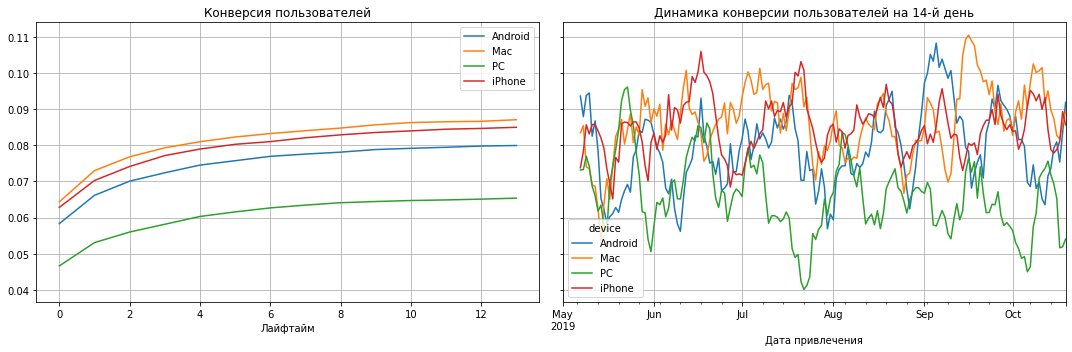

In [51]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

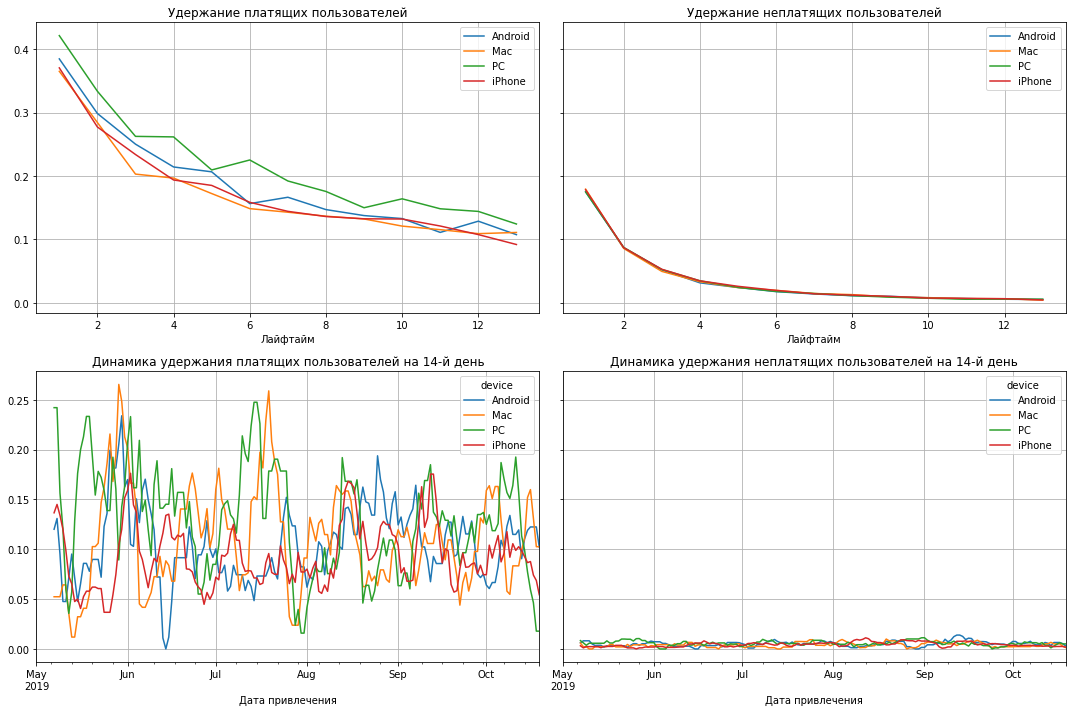

In [52]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions)
plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Обрати внимание, что удержание неплатящих пользователей из разных каналов, стран, платформ ровное, а удержание платящих очень отличается, как считаешь почему так?
</div>

<div class="alert alert-info"> <b> Анализ конверсии и удержания по устройствам говорит, что у устройств iOS конверсия лучше на 2%. При этом удержание чуть хуже. Динамика конверсии и удержпнияя 14го дня подвержены очеь сильным колебаниям от 0 до 25% </div> 

In [53]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

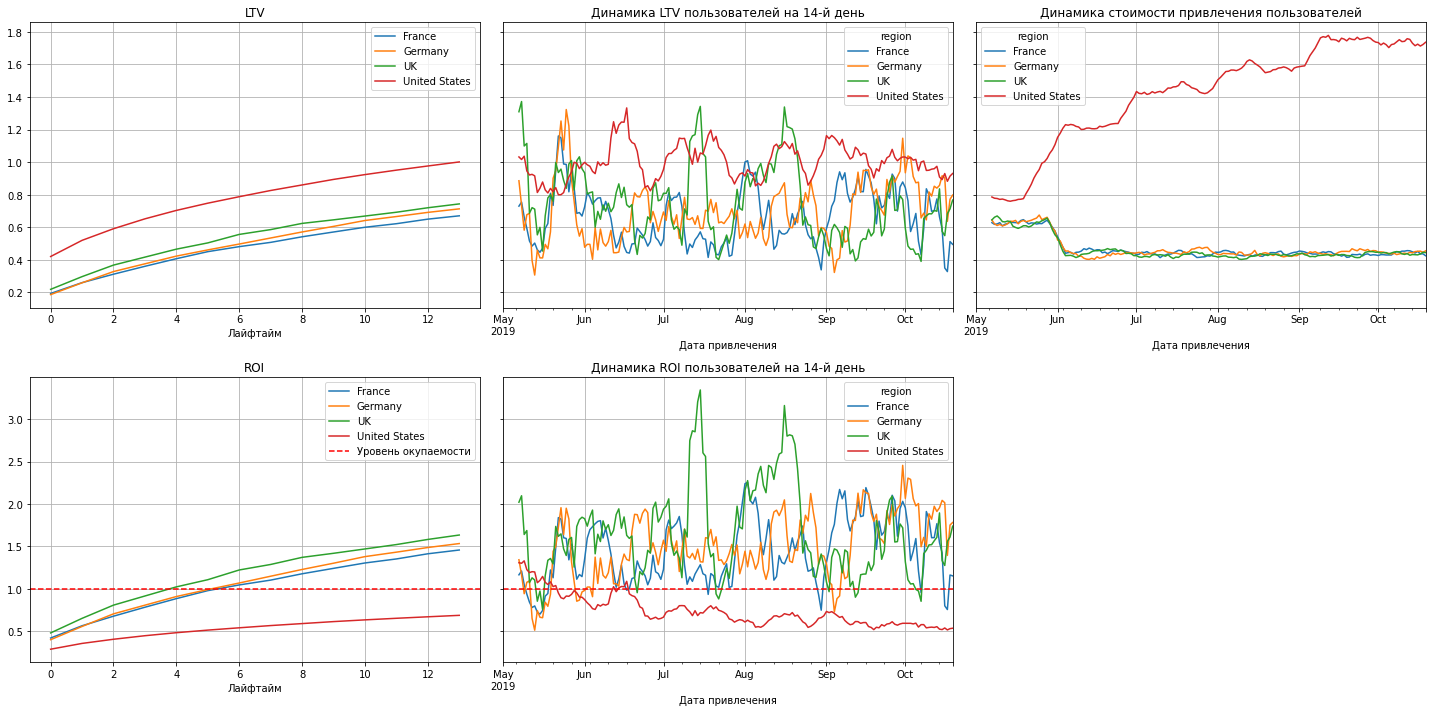

In [54]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Хочу акцентировать внимание на сходство динамики стоимостей привлечения по `US` и `Tip Top`, это неспроста)</div>

Динамика по странам дает ещё больший разброс Америка очень сильно отличается от всех остальных регионов максимальный стоимостью привлечения и не выходит на точку окупаемость остальных стран примерно все одинаково и а все остальные выходят на окупаемость

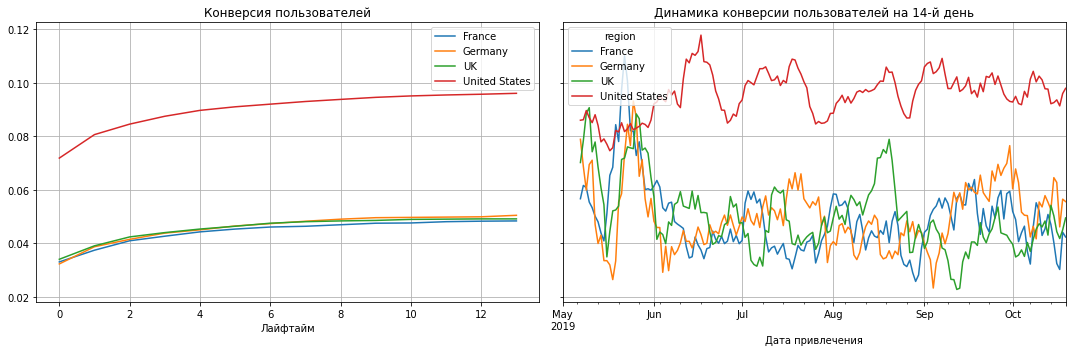

In [55]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

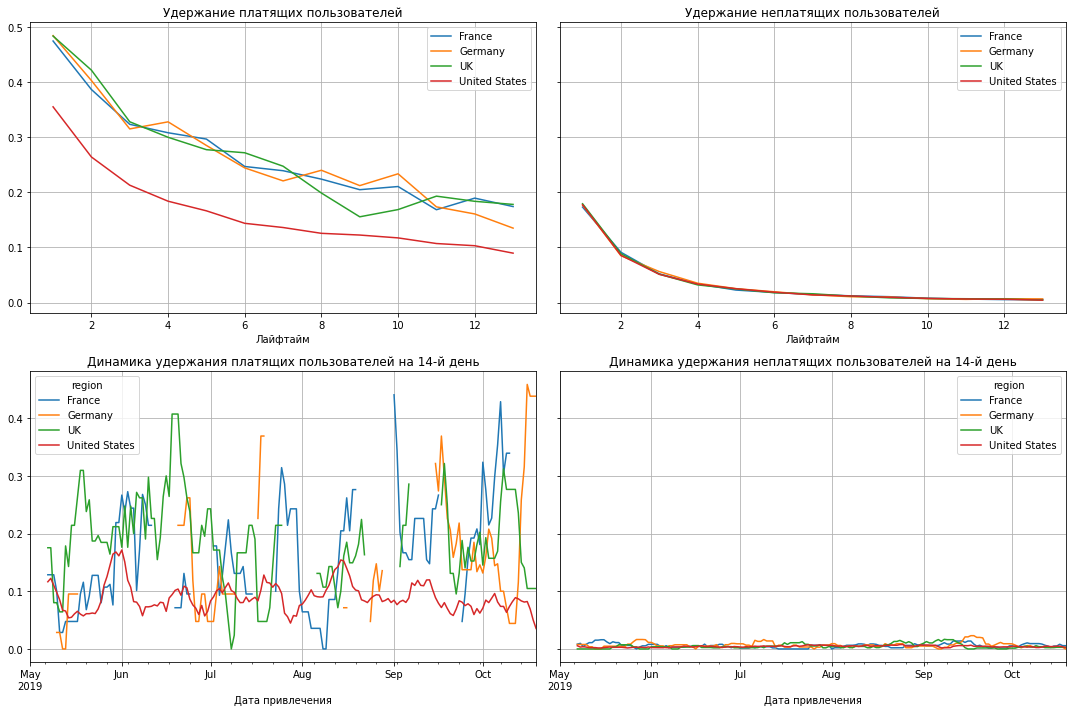

In [56]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions)
plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Существенная проблема - плохое удержание в US, можно было подробнее посмотреть на всех ли каналах, которые приводят трафик в US, такая ситуация, анонсирую, что два самых крупных канала приводят трафик только из US, если захочешь, можешь поисследовать. Любопытно, что динамика конверсии `US` становится с течением времени не такой волатильной. </div>

In [57]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

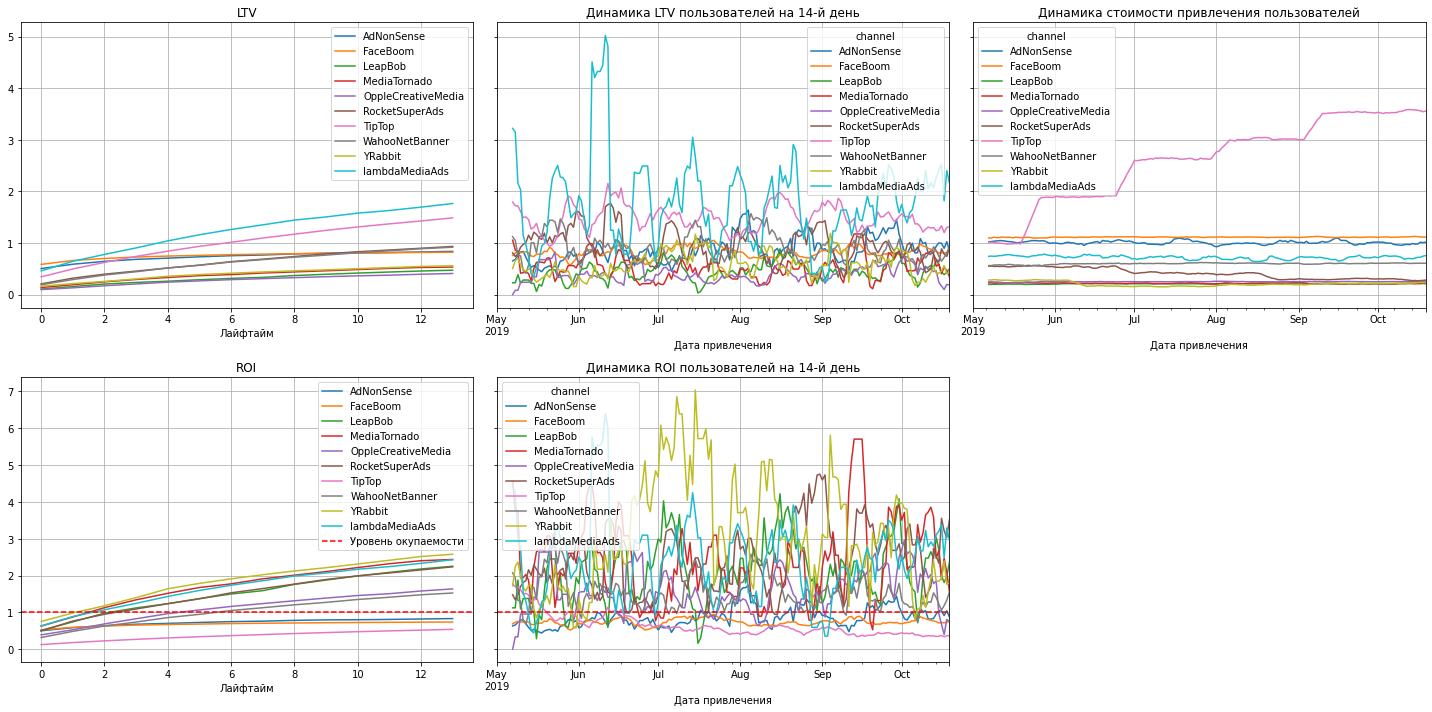

In [58]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

Тут мы наблюдаем что реклама на каналах TipTop,  FaceBoom и AdNonSense не выходит на точку окупаемости. Это наши 3 самых дорогих канала привлечения клиентов. При этом то стоимость привлечения пользователей на канале TikTok значительно выросло со временем

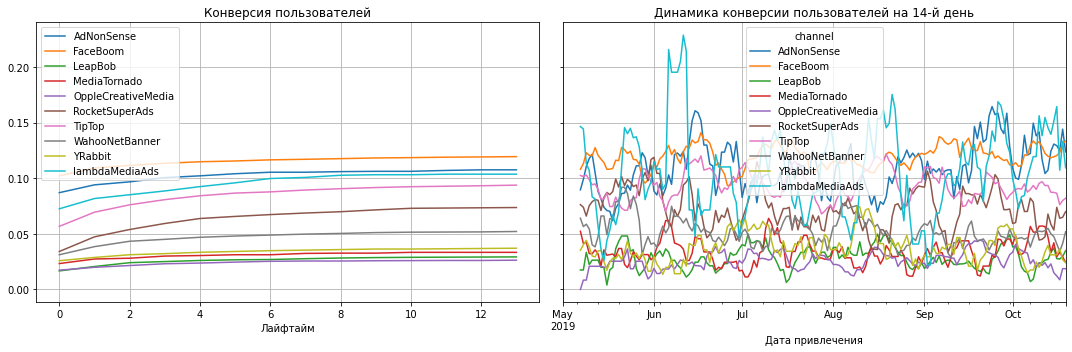

In [59]:
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions)
plot_conversion(conversion_grouped, conversion_history, horizon_days)

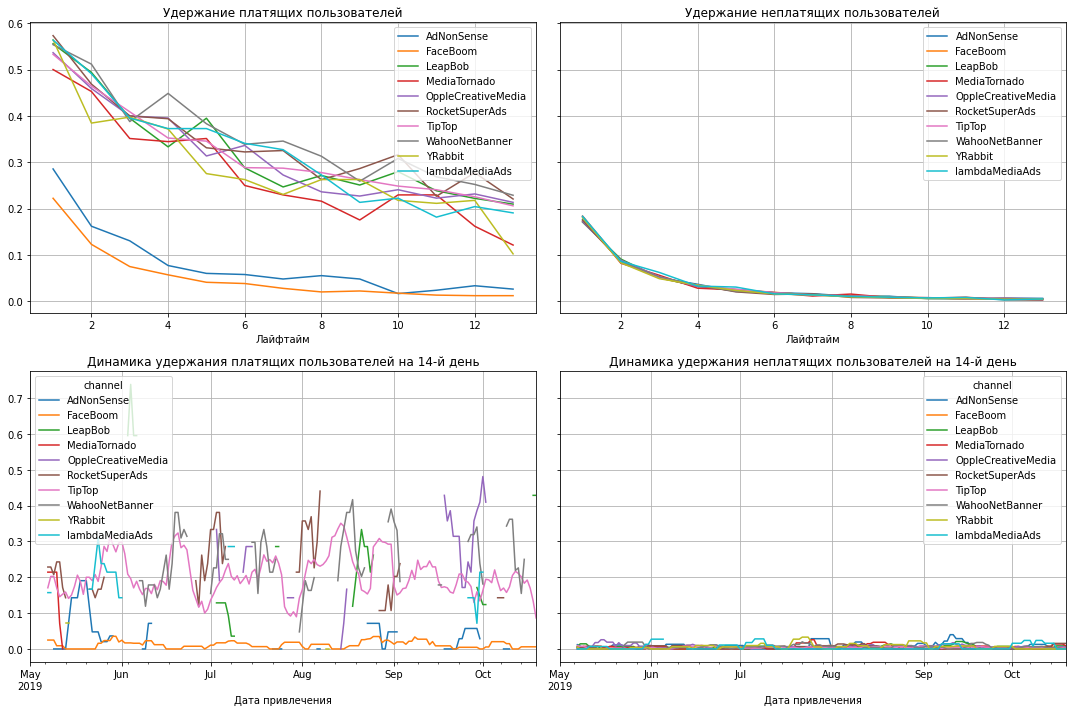

In [60]:
retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions)
plot_retention(retention_grouped, retention_history, horizon_days)

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
Чудеса декомпозиции,  отличный подход, который всегда приведёт к успеху, разобрались с LTV И ROI, получили явную проблему в US и TIp Top с Faceboom, при учете, что US - страна с наибольшим количеством пользователей, а Tip TOp и FaceBoom - крупнешие каналы для нас это важные находки, дальше с которыми стоит работать</div>


### <div class="alert alert-info"> <b>попробуем убрать из рассмотрения явных аутсайдеров и поискать точки роста.</div>

In [61]:
profiles_t = profiles[profiles['region'] != 'United States']

In [62]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_t, orders, observation_date, horizon_days, dimensions=dimensions
)

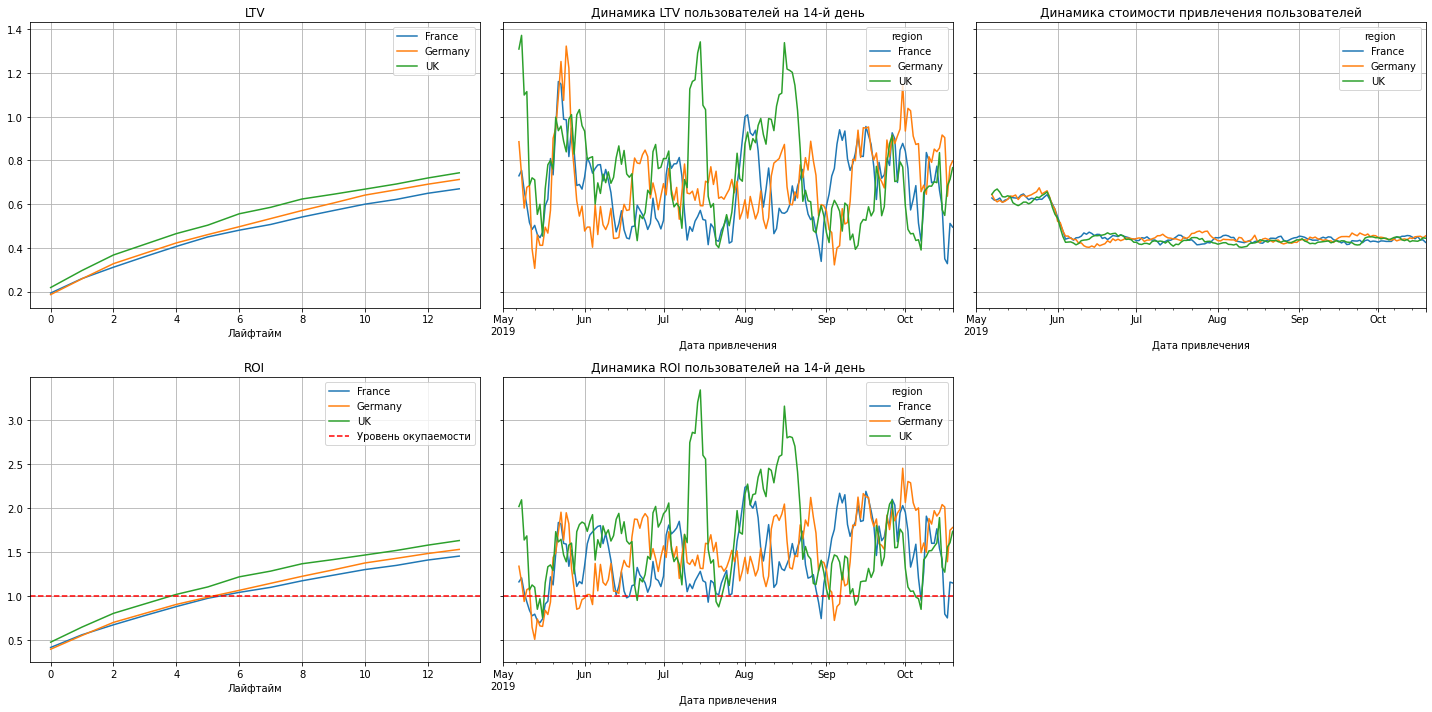

In [63]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [64]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_t, orders, observation_date, horizon_days, dimensions=dimensions
)

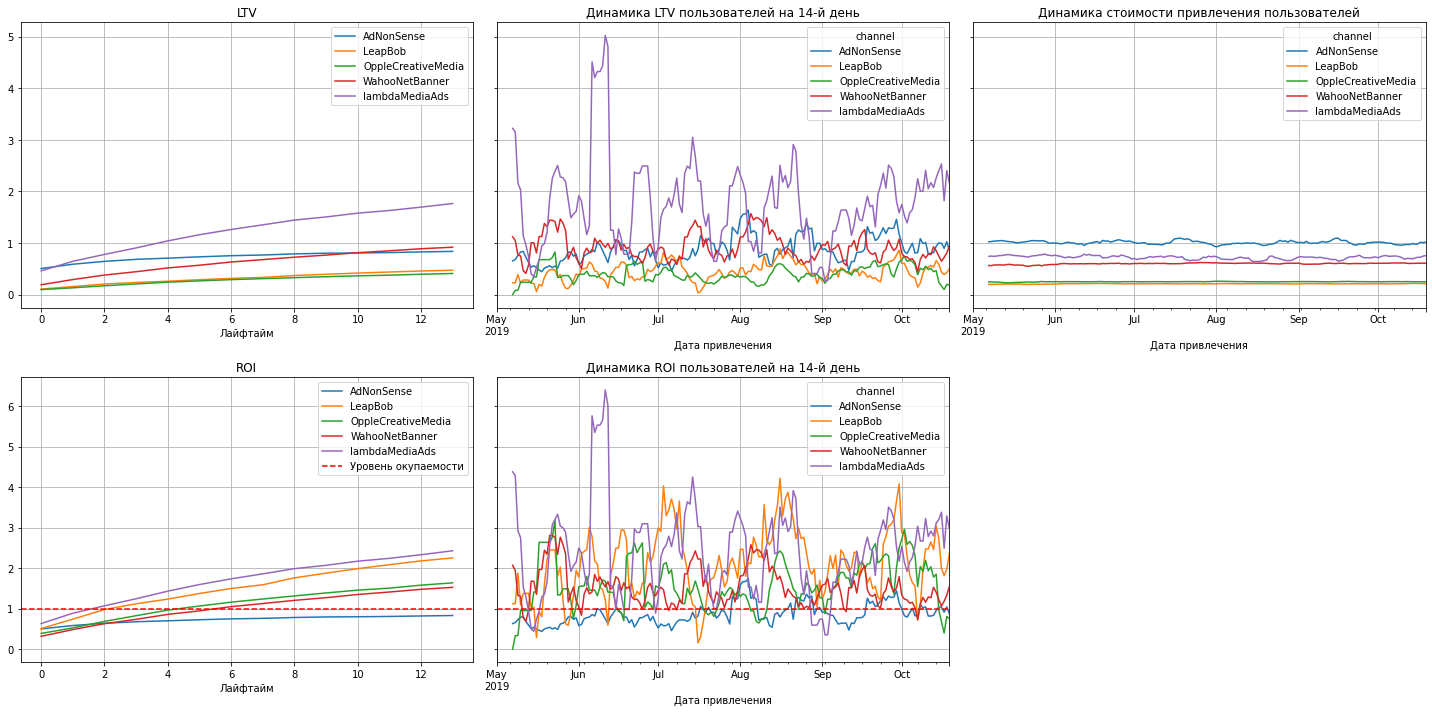

In [65]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-info"> <b>Удивительное дело. Как только мы убрали США, дела резко с тобой пошли лучше. Во-первых мы видим что дорогие каналы привлечения фэйс бум и тик топ исчезли. Это означает что они были направлены только на Америку. Остался ещё один канал AdNonSense который не вышел на точку окупаемости, его можно тоже удалить. Остальные каналы рекламы действуют очень хорошо и уже на второй четвёртый день выходит на окупаемость. </div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
   

Крайне полезная находка для объяснения всех проблем - связь каналов и стран, на самом деле все каналы кроме органики имеют региональную специфику
</div>

<div class="alert alert-info"> <b>Попробуем теперь поступить иначе. Американский рынок самый большой и его сложно убирать из рассмотрения. Попробуем брать каналы привлечения FaceBoom и TipTop, а Америку оставить. Посмотрим что получится.</div>

In [66]:
profiles_t = profiles[(profiles['channel'] != 'FaceBoom')&((profiles['channel'] != 'TipTop'))]

In [67]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_t, orders, observation_date, horizon_days, dimensions=dimensions
)

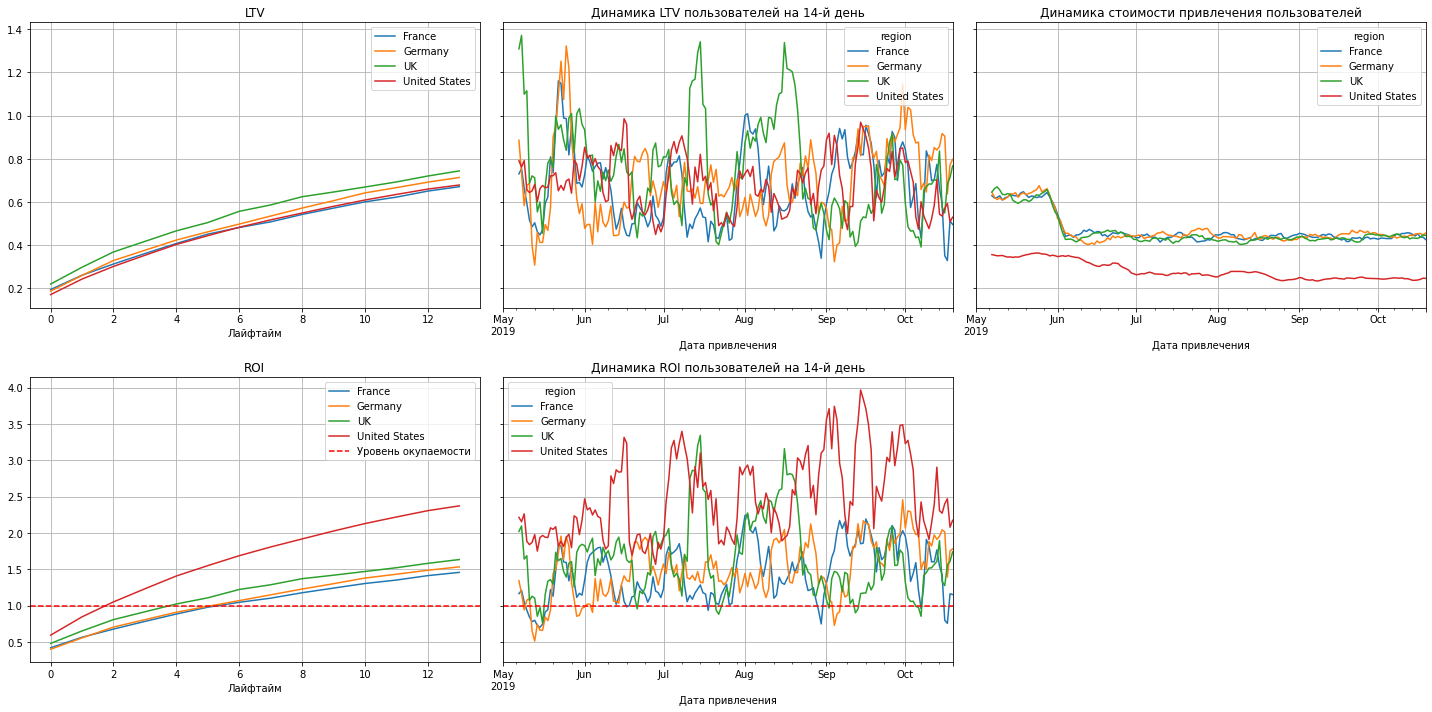

In [68]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [69]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_t, orders, observation_date, horizon_days, dimensions=dimensions
)

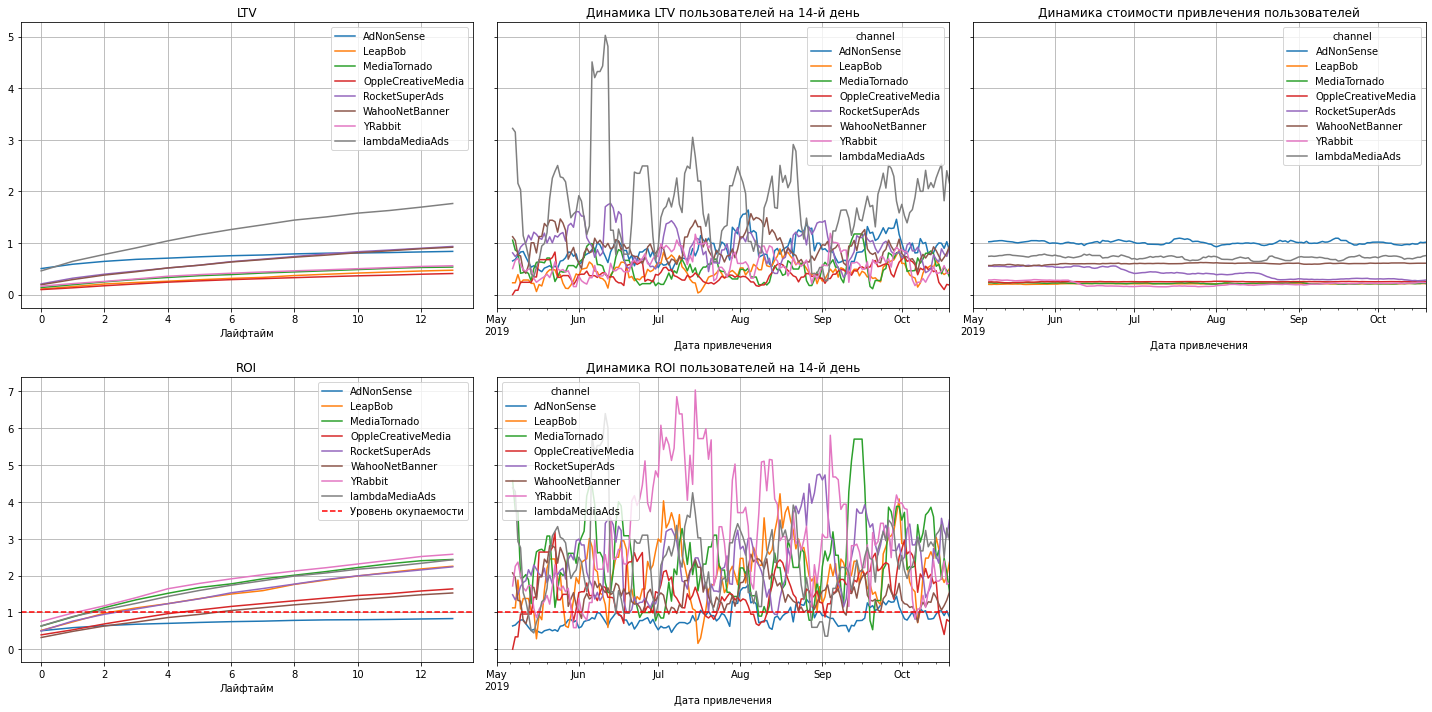

In [70]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-info"> <b>Фантастика! Наши дела пошли в гору! Америка полностью исправилась и вышла на первое место по окупаемости. При этом остался еще один "плохой' канал AdNonSense. Попробуем его тоже убрать и посмотрим, что останется поправить.</div>

In [71]:
profiles_t = profiles[(profiles['channel'] != 'FaceBoom')&((profiles['channel'] != 'TipTop'))&((profiles['channel'] != 'AdNonSense'))]

In [72]:
dimensions = ['region']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_t, orders, observation_date, horizon_days, dimensions=dimensions
)

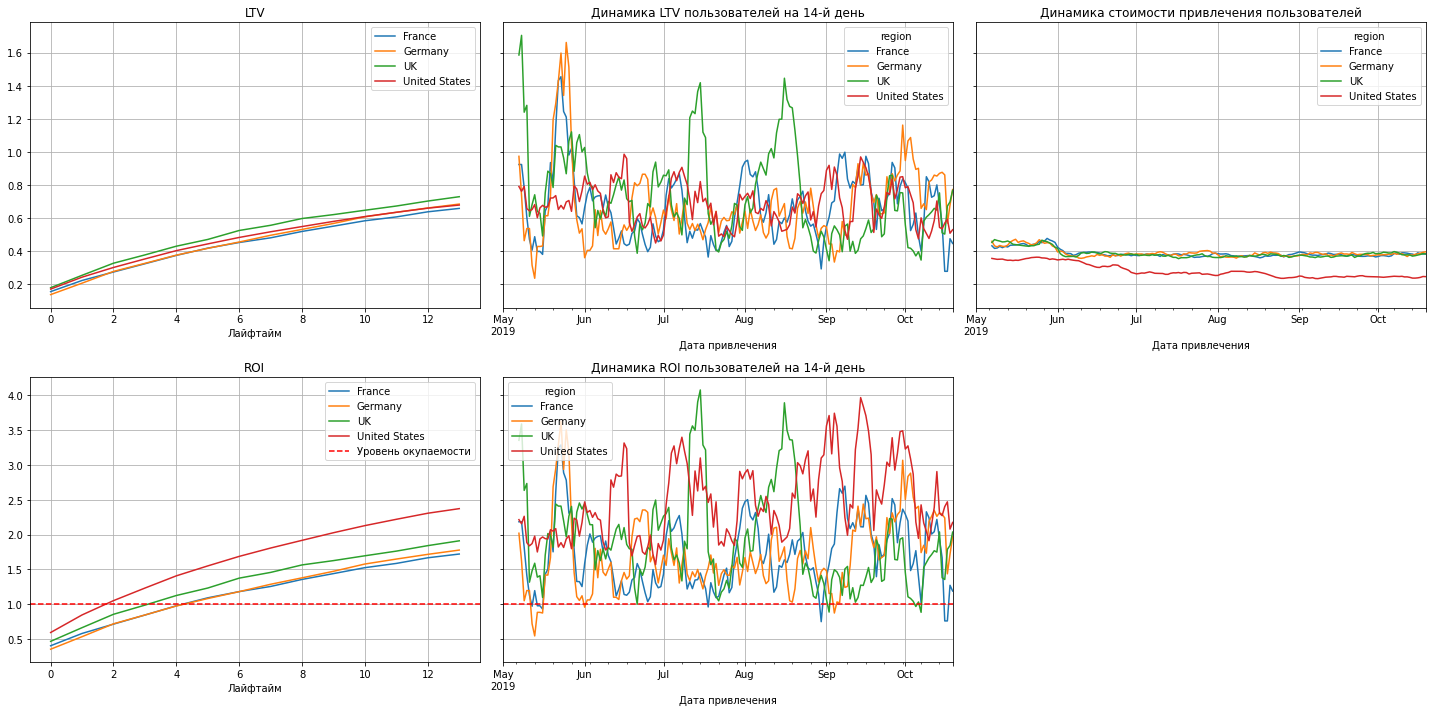

In [73]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [74]:
dimensions = ['channel']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_t, orders, observation_date, horizon_days, dimensions=dimensions
)

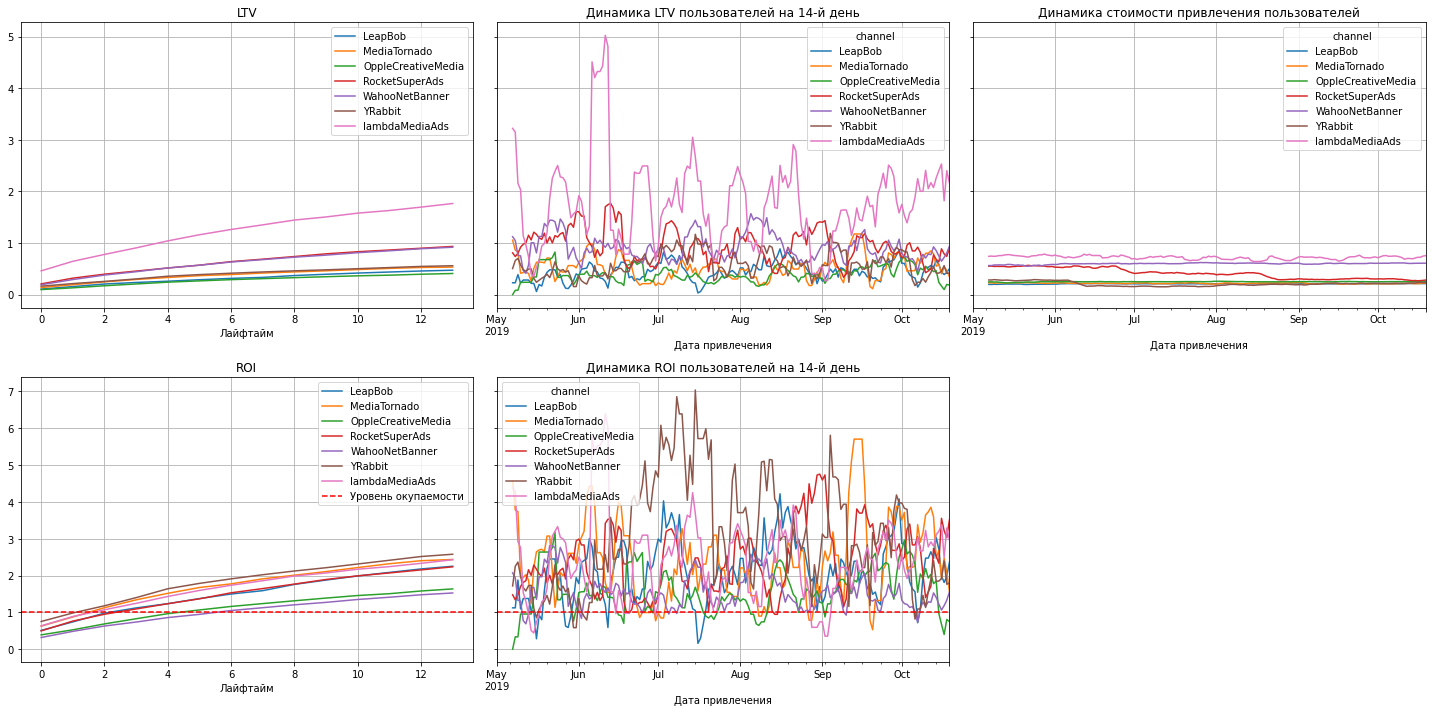

In [75]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

In [76]:
dimensions = ['device']
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles_t, orders, observation_date, horizon_days, dimensions=dimensions
)

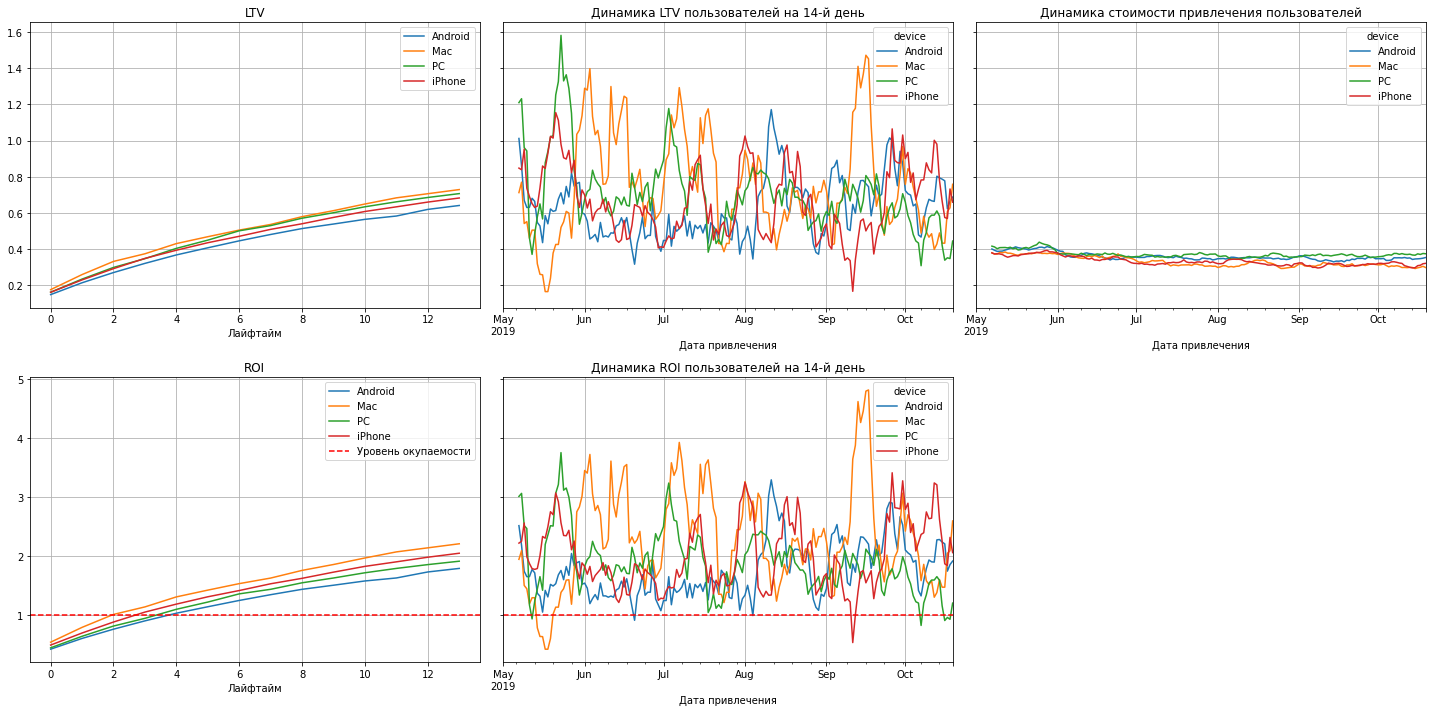

In [77]:
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days)

<div class="alert alert-info"> <b>Ну чтож. Похоже нам удалось найти якорь, тянущий наш бизнес на дно. Проблема была в рекламе на 3х каналах. Как только мы их убираем, все становится на свои места. Причем на столько хорошо, что на окупаемость мы выходим уже на 2-4 день. </div>

### Выводы

- Выделите причины неэффективности привлечения пользователей.
- Сформулируйте рекомендации для отдела маркетинга.

- Определили из каких регионов у нас есть пользователи и определили долю платящих пользователей. Самое высокое количество пользователей из США и там же самая высокая доля платящих пользователей
- Провели разбиение по устройством и также определили долю платящих пользователей по устройству. Больше всего пользователей пользуются iPhone. Самый высокой процент платящих через Mac, при этом процент платящих очень близок для всех четырёх устройств.
- Рассмотрели каналы привлечения пользователей. Определили из каких каналов самый высокий процент платящих пользователей. Больше всего пользователей пришло органик при этом там самый низкий процент платящих пользователей. На втором месте Faceboom и там же самый высокий процент платящих пользователей. На третьем месте Tip-Top по привлечению и четвёртый по платящим пользователям.
- Рассмотрели динамику расходов по источникам. По неделям и по месяцам. Выяснили что основные расходы связаны с продвижением Faceboom и TipTop. на TipTop тратится денег больше всего. Расходы растут.
- по графикам делаем выводы: Реклама окупается с трудом. Только на 13-14 день выходит на т.окупаемости. Динамика LTV стабильна. Есть помесячные колебания. САС растет. Очевидно, что с ростом расходов на рекламу мы не получаем адекватного роста числа клиентов. ROI падает. И перестает выходить на т.окупаемости на 14й день.
- Конверсия выросла в первый месяц дальше с учётом колебаний оставалась стабильной
- Графики удержания показывают падение удержания.
- Разбивка по устройствам показывает, что стоимость привлечения пользователей на всех устройствах растёт. при этом максимальная стоимость привлечения на iPhone и Mac и именно iPhone и Mac не выходит на точку окупаемости. В то время как андроид и PC выходит
- Динамика по странам дает ещё больший разброс. Америка очень сильно отличается от всех остальных регионов максимальный стоимостью привлечения и не выходит на точку окупаемости. У остальных стран примерно все одинаково и  все остальные выходят на окупаемость.
- Анализируя каналы рекламы наблюдаем, что реклама на каналах TipTop,  FaceBoom и AdNonSense не выходит на точку окупаемости. Это наши 3 самых дорогих канала привлечения клиентов. При этом стоимость привлечения пользователей на канале TipTop значительно выросло со временем.

Рекомендация для бизнеса. Перестать ориентироваться в продвижении на рекламу в Америке, на пользователей iOS. Значительно снизить рекламный бюджет в TipTop, FaceBoom AdNonSense. При этом от рекалмы в TipTop стоит вообще воздержаться или оставить минимальный эффект присутствия. Очевидно, по перечисленным калалам достигнута точка насыщения и дальнейшее вкладывание средств не дает эффекта масштаба. необходимо переориенировать рекламный бюджет на Европу, Android, PC. 

<div class="alert alert-info"> <b>Последовательным удалением наиболее убыточных звеньев, нам удалось найти факторы, тянущие на дно наш бизнес. Ими оказались 3 рекламные канала - TipTop, FaceBoom, AdNonSense. Они были ориентированы на рекламу в Америке и на устройствах iOS. Портя им статистику. Удалив эти каналы из рассмотрения, мы поняли, что Америка и iOS полностью реабилитировались и даже остались в лидерах. Теперь реклама окупается уже на 2-4 день. Очевидно, имеет смысл переориантировать рекламный бюджет на оставшиеся каналы. При этом не забывать контролировать метрики, чтоб своевременно заметить ситуацию типа TipTop. Когда стоимость привлечения клиентов выросла значительно и реклама перестала окупаться.</div>

<div class="alert alert-success">
<b>Комментарий ревьюера v2:</b>☀️
    
* Отличная работа, все критические замечания исправлены, принимаю проект, ты молодец). Спасибо, что выявил связь стран и каналов, это крайне важно . Ну и я считаю важной рекомендацией - чаще обращать внимания на показатели маркетинга, а то очень похоже, что маркетинговый отдел долгое время сжигал деньги не очень эффективно). В работе я оставил некоторое количество мелких рекомендаций от себя, надеюсь ты из них вынесешь что-то для себя и будешь активно применять в будущих проектах и работе.) Рекомендую поработать над оформлением теста `markdown` разметкой и особенно распространить оглавление, его можно сделать более подробным, что упростит навигацию по проекту, сейчас твоё оглавление выглядит так 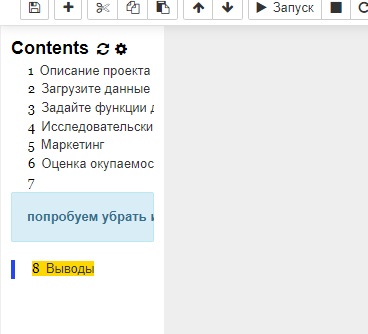
    
* О том, как **форматировать текст** в Markdown ячейке или как добавлять ссылки, ты можешь узнать [тут](https://sqlbak.com/blog/jupyter-notebook-markdown-cheatsheet)
    
* В части по анализу графиков я оставил несколько вопросов, но так как проект я принимаю не хочу оставлять тебя без ответов. В более ровном удержании виновато число пользователей. Когда говорим об удержании платящих, видим величину волатильную, но это не из-за её природы, а из-за того, что наблюдений мало, и каждое отдельное наблюдение существенно влияет на оценку, такая особенность часто может проявляться в анализе, так что рекомендую проверять число наблюдений, чтобы не ошибаться с выводами.
   
* Сейчас работаю аналитиком в отделе закупки игровой компании и US это действительно наибольший рынок, ему достается процентов 30-40 всего трафика, да набор каналов существенно шире, но US доминирует в этом плане. Конечно у нас перед глазами набор дашбордов, которые позволяют контролировать множество всяких метрик, но периодически бывает всякое, конечно же масштабирование канала, который становится всё хуже и хуже - сомнительная идея, а оптимизации происходят существенно чаще, по некоторым каналам раз в неделю, а по некоторым и ещё чаще). Благодарю за совместную работу, желаю удачи!) 
    
</div>